In [14]:
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import json
import torch

In [6]:
# load pre-trained model
model = torchvision.models.alexnet(pretrained=True)

class_names = json.load(open("vs3ex1data/imagenet_class_index.json"))   # read class names
class_names = [class_names[str(x)][1] for x in range(0,1000)]

print(model)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])  # pixel value normalization
scale = transforms.Resize([224,224])  # image re-size (to square)
tote = transforms.ToTensor()   # transfor to tensor
comptran = transforms.Compose([scale,tote,normalize]) # put all transformations together

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /Users/sofiapetryshyn/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


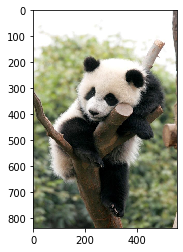

Image  1 : seems to be giant_panda . The prob =  0.999 ; Class of prob =  tensor(388)


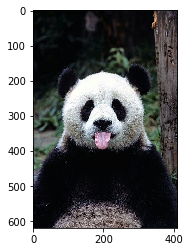

Image  2 : seems to be giant_panda . The prob =  1.0 ; Class of prob =  tensor(388)


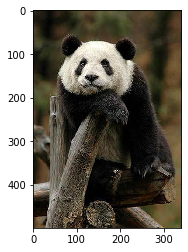

Image  3 : seems to be giant_panda . The prob =  1.0 ; Class of prob =  tensor(388)


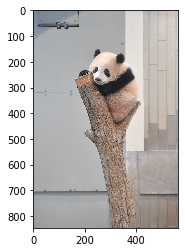

Image  4 : seems to be meerkat . The prob =  0.187 ; Class of prob =  tensor(299)


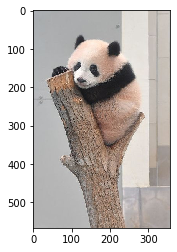

Image  5 : seems to be giant_panda . The prob =  0.849 ; Class of prob =  tensor(388)


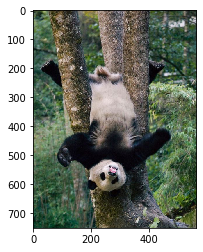

Image  6 : seems to be giant_panda . The prob =  0.791 ; Class of prob =  tensor(388)


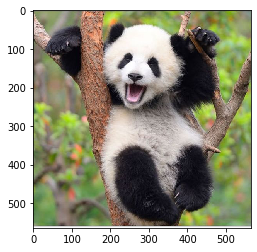

Image  7 : seems to be giant_panda . The prob =  0.809 ; Class of prob =  tensor(388)


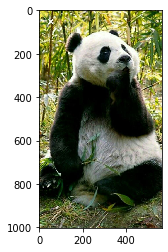

Image  8 : seems to be giant_panda . The prob =  1.0 ; Class of prob =  tensor(388)


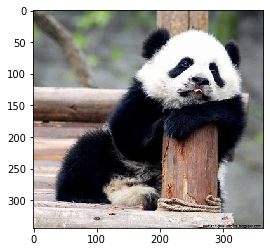

Image  9 : seems to be giant_panda . The prob =  0.986 ; Class of prob =  tensor(388)


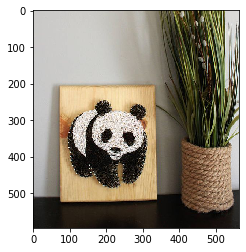

Image  10 : seems to be teddy . The prob =  0.152 ; Class of prob =  tensor(850)


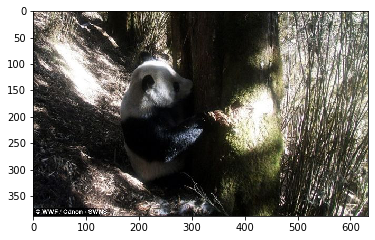

Image  11 : seems to be gorilla . The prob =  0.347 ; Class of prob =  tensor(366)


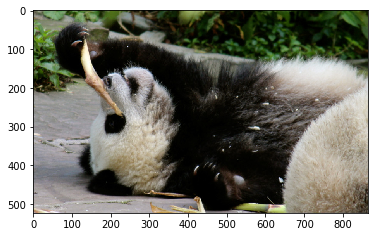

Image  12 : seems to be giant_panda . The prob =  0.971 ; Class of prob =  tensor(388)


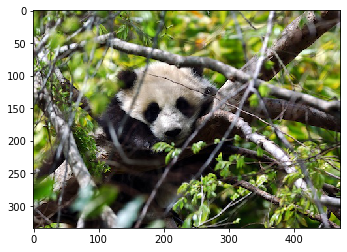

Image  13 : seems to be Madagascar_cat . The prob =  0.701 ; Class of prob =  tensor(383)


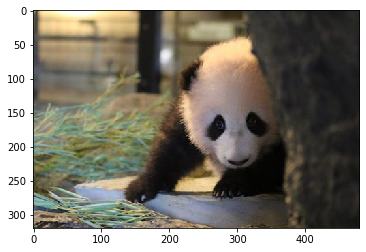

Image  14 : seems to be giant_panda . The prob =  0.974 ; Class of prob =  tensor(388)


In [46]:
model.eval()   # put network in evaluation mode

for i in range(1,14+1):
    img = Image.open('vs3ex1data/panda/panda'+str(i)+'.jpg')
    plt.imshow(img)
    plt.show()
    plt.pause(0.1)
    # transorm image and feed to the network 
    img = comptran(img)
    batch = img.unsqueeze(0)

    # print the predicted class and corresponding probability
    with torch.no_grad():
        out = model(batch)
    
    pred = torch.nn.functional.softmax(out[0], dim=0)
    pred_class = (pred == max(pred)).nonzero()[0][0]
    print('Image ', i, ': seems to be', class_names[pred_class], \
          '. The prob = ', round(float(max(pred)), 3), '; Class of prob = ', pred_class)